## Image Augmentations on Knee MRI Data

In [76]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndi
import h5py

I used the ndimage and scikit image libraries to apply the augmentations.

In [77]:
from skimage import data
from skimage import exposure
from skimage import io
from skimage import transform
from skimage.transform import rotate, AffineTransform, resize
from skimage.util import random_noise
from skimage import filters

Loading the input image from the 'valid' data set.

In [78]:
fname_img = './valid/valid_012_V00.im'
fname_seg = './valid/valid_012_V00.seg'

slnum = 100
masknum = 0

with h5py.File(fname_img,'r') as hf:
    img = np.array(hf['data'])

with h5py.File(fname_seg,'r') as hf:
    seg = np.array(hf['data'])  

### Gamma Adjustment

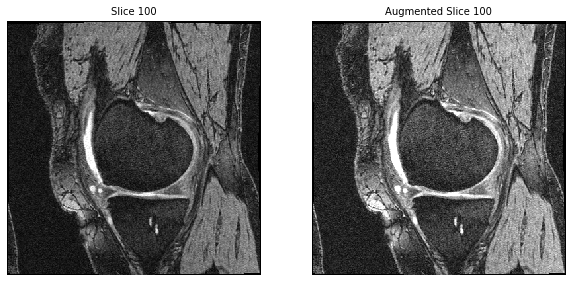

In [112]:
fig, axs = plt.subplots(1, 2, figsize = (10,10))

axs[0].imshow(img[...,slnum], vmin = 0, vmax = 0.005, cmap = 'gray')
axs[0].set_title('Slice {}'.format(slnum), fontsize= 10)
axs[0].axis('off')

axs[1].imshow(exposure.adjust_gamma(img[...,slnum], 0.95), vmin = 0, vmax = 0.005, cmap = 'gray')
axs[1].set_title('Augmented Slice {}'.format(slnum), fontsize= 10)
axs[1].axis('off')

plt.show()

### Scaling

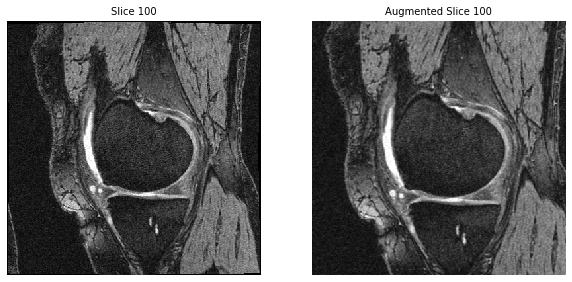

In [92]:
fig, axs = plt.subplots(1, 2, figsize = (10,10))

axs[0].imshow(img[...,slnum], vmin = 0, vmax = 0.005, cmap = 'gray')
axs[0].set_title('Slice {}'.format(slnum), fontsize= 10)
axs[0].axis('off')

amount = 20
axs[1].imshow(resize(img[amount:-amount, amount:-amount, slnum], (384, 384)), vmin = 0, vmax = 0.005, cmap = 'gray')
axs[1].set_title('Augmented Slice {}'.format(slnum), fontsize= 10)
axs[1].axis('off')

plt.show()

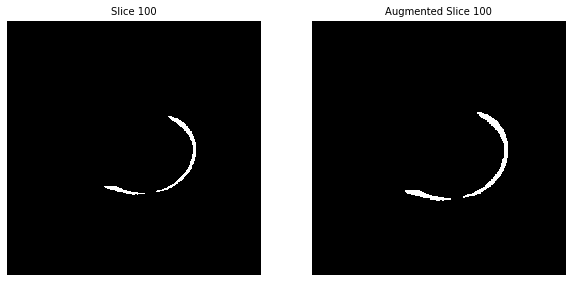

In [94]:
fig, axs = plt.subplots(1, 2, figsize = (10,10))

axs[0].imshow(seg[...,slnum,masknum], vmin = 0, vmax = 0.005, cmap = 'gray')
axs[0].set_title('Slice {}'.format(slnum), fontsize= 10)
axs[0].axis('off')

amount = 20
axs[1].imshow(resize(seg[amount:-amount, amount:-amount, slnum, masknum], (384, 384), preserve_range = True), vmin = 0, vmax = 0.005, cmap = 'gray')
axs[1].set_title('Augmented Slice {}'.format(slnum), fontsize= 10)
axs[1].axis('off')

plt.show()

### Shear

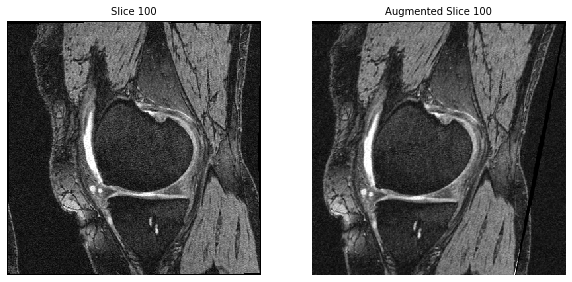

In [80]:
fig, axs = plt.subplots(1, 2, figsize = (10,10))

axs[0].imshow(img[...,slnum], vmin = 0, vmax = 0.005, cmap = 'gray')
axs[0].set_title('Slice {}'.format(slnum), fontsize= 10)
axs[0].axis('off')

axs[1].imshow(transform.warp(img[...,slnum], AffineTransform(shear = -0.2), order=1, preserve_range=True, mode='wrap'), vmin = 0, vmax = 0.005, cmap = 'gray')
axs[1].set_title('Augmented Slice {}'.format(slnum), fontsize= 10)
axs[1].axis('off')

plt.show()

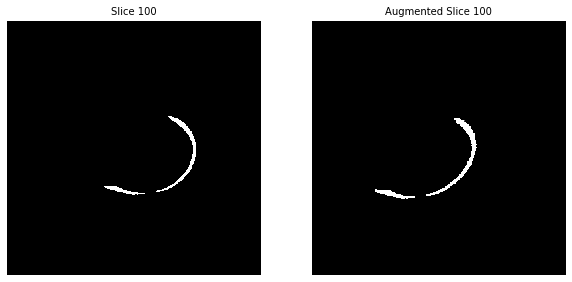

In [107]:
fig, axs = plt.subplots(1, 2, figsize = (10,10))

axs[0].imshow(seg[...,slnum, masknum], vmin = 0, vmax = 0.005, cmap = 'gray')
axs[0].set_title('Slice {}'.format(slnum), fontsize= 10)
axs[0].axis('off')

axs[1].imshow(transform.warp(seg[...,slnum, masknum], AffineTransform(shear = -0.2), order=1, preserve_range=True, mode='wrap'), vmin = 0, vmax = 0.005, cmap = 'gray')
axs[1].set_title('Augmented Slice {}'.format(slnum), fontsize= 10)
axs[1].axis('off')

plt.show()

### Motion Blur

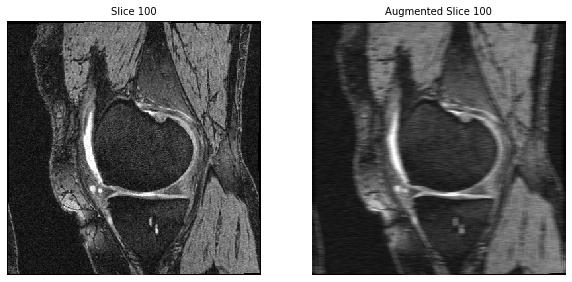

In [99]:
fig, axs = plt.subplots(1, 2, figsize = (10,10))

axs[0].imshow(img[...,slnum], vmin = 0, vmax = 0.005, cmap = 'gray')
axs[0].set_title('Slice {}'.format(slnum), fontsize= 10)
axs[0].axis('off')

size = 9
kernel = np.zeros((size, size))
kernel[int((size-1)/2), :] = np.ones(size)
kernel = kernel / size

axs[1].imshow(ndi.convolve(img[...,slnum], kernel), vmin = 0, vmax = 0.005, cmap = 'gray')
axs[1].set_title('Augmented Slice {}'.format(slnum), fontsize= 10)
axs[1].axis('off')

plt.show()

### Combination (four previous augmentations all applied)

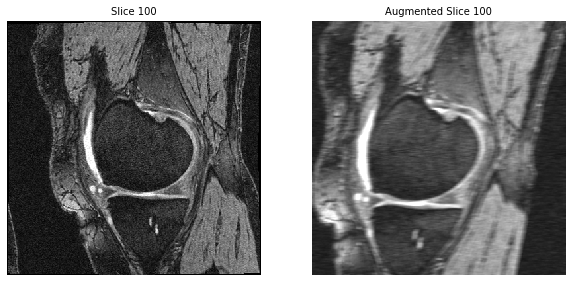

In [113]:
fig, axs = plt.subplots(1, 2, figsize = (10,10))

axs[0].imshow(img[...,slnum], vmin = 0, vmax = 0.005, cmap = 'gray')
axs[0].set_title('Slice {}'.format(slnum), fontsize= 10)
axs[0].axis('off')

amount = 20
aug1 = resize(img[amount:-amount, amount:-amount, slnum], (384, 384))

aug2 = transform.warp(aug1, AffineTransform(shear = -0.2), order=1, preserve_range=True, mode='wrap')

aug3 = exposure.adjust_gamma(aug2, 0.95)

size = 9
kernel = np.zeros((size, size))
kernel[int((size-1)/2), :] = np.ones(size)
kernel = kernel / size
aug4 = ndi.convolve(aug3, kernel)

axs[1].imshow(aug4, vmin = 0, vmax = 0.005, cmap = 'gray')
axs[1].set_title('Augmented Slice {}'.format(slnum), fontsize= 10)
axs[1].axis('off')

plt.show()

### Rotation

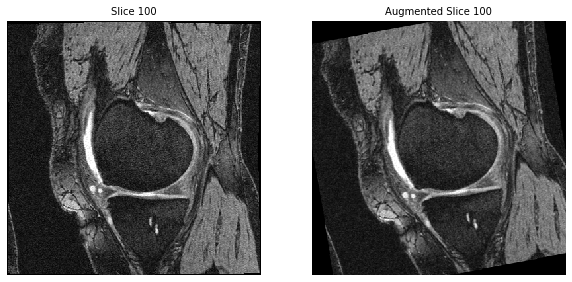

In [82]:
fig, axs = plt.subplots(1, 2, figsize = (10,10))

axs[0].imshow(img[...,slnum], vmin = 0, vmax = 0.005, cmap = 'gray')
axs[0].set_title('Slice {}'.format(slnum), fontsize= 10)
axs[0].axis('off')

axs[1].imshow(rotate(img[...,slnum], 10), vmin = 0, vmax = 0.005, cmap = 'gray')
axs[1].set_title('Augmented Slice {}'.format(slnum), fontsize= 10)
axs[1].axis('off')

plt.show()

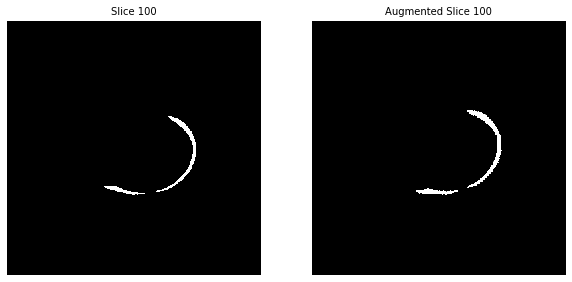

In [84]:
fig, axs = plt.subplots(1, 2, figsize = (10,10))

axs[0].imshow(seg[...,slnum, masknum], vmin = 0, vmax = 0.005, cmap = 'gray')
axs[0].set_title('Slice {}'.format(slnum), fontsize= 10)
axs[0].axis('off')

axs[1].imshow(rotate(seg[...,slnum, masknum], 10, preserve_range = True), vmin = 0, vmax = 0.005, cmap = 'gray')
axs[1].set_title('Augmented Slice {}'.format(slnum), fontsize= 10)
axs[1].axis('off')

plt.show()

### Flip

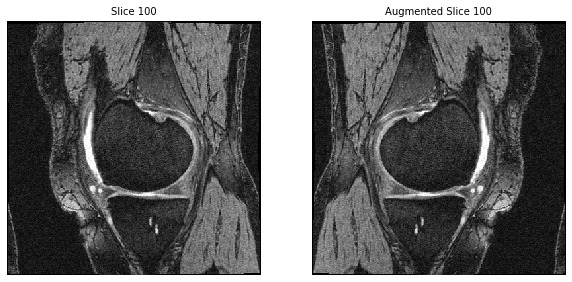

In [100]:
fig, axs = plt.subplots(1, 2, figsize = (10,10))

axs[0].imshow(img[...,slnum], vmin = 0, vmax = 0.005, cmap = 'gray')
axs[0].set_title('Slice {}'.format(slnum), fontsize= 10)
axs[0].axis('off')

axs[1].imshow(img[:,::-1,slnum], vmin = 0, vmax = 0.005, cmap = 'gray')
axs[1].set_title('Augmented Slice {}'.format(slnum), fontsize= 10)
axs[1].axis('off')

plt.show()

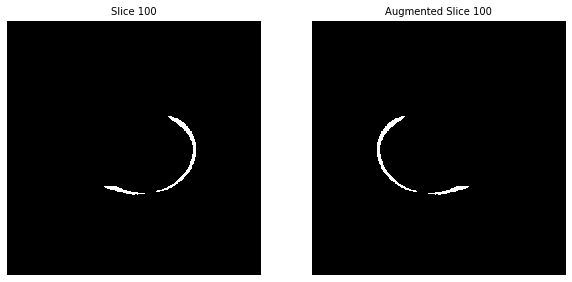

In [101]:
fig, axs = plt.subplots(1, 2, figsize = (10,10))

axs[0].imshow(seg[...,slnum, masknum], vmin = 0, vmax = 0.005, cmap = 'gray')
axs[0].set_title('Slice {}'.format(slnum), fontsize= 10)
axs[0].axis('off')

axs[1].imshow(seg[:,::-1,slnum, masknum], vmin = 0, vmax = 0.005, cmap = 'gray')
axs[1].set_title('Augmented Slice {}'.format(slnum), fontsize= 10)
axs[1].axis('off')

plt.show()

### Translation

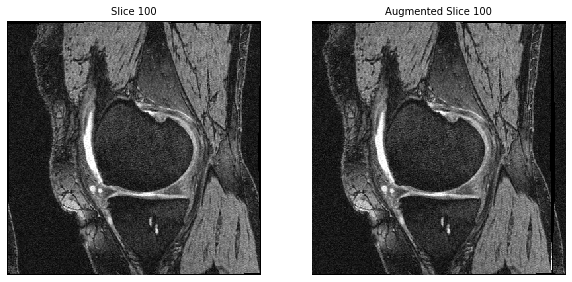

In [104]:
fig, axs = plt.subplots(1, 2, figsize = (10,10))

axs[0].imshow(img[...,slnum], vmin = 0, vmax = 0.005, cmap = 'gray')
axs[0].set_title('Slice {}'.format(slnum), fontsize= 10)
axs[0].axis('off')

axs[1].imshow(transform.warp(img[...,slnum], AffineTransform(translation = (20, 0)), order=1, preserve_range=True, mode='wrap'), vmin = 0, vmax = 0.005, cmap = 'gray')
axs[1].set_title('Augmented Slice {}'.format(slnum), fontsize= 10)
axs[1].axis('off')

plt.show()

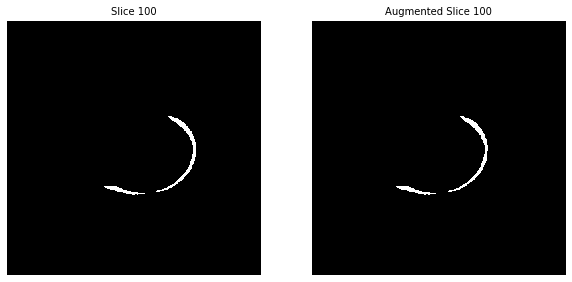

In [116]:
fig, axs = plt.subplots(1, 2, figsize = (10,10))

axs[0].imshow(seg[...,slnum, masknum], vmin = 0, vmax = 0.005, cmap = 'gray')
axs[0].set_title('Slice {}'.format(slnum), fontsize= 10)
axs[0].axis('off')

axs[1].imshow(transform.warp(seg[...,slnum, masknum], AffineTransform(translation = (20, 0)), order=1, preserve_range=True, mode='wrap'), vmin = 0, vmax = 0.005, cmap = 'gray')
axs[1].set_title('Augmented Slice {}'.format(slnum), fontsize= 10)
axs[1].axis('off')

plt.show()

### Gaussian Filter

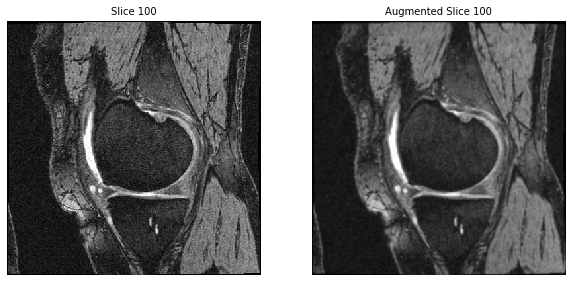

In [114]:
fig, axs = plt.subplots(1, 2, figsize = (10,10))

axs[0].imshow(img[...,slnum], vmin = 0, vmax = 0.005, cmap = 'gray')
axs[0].set_title('Slice {}'.format(slnum), fontsize= 10)
axs[0].axis('off')

axs[1].imshow(filters.gaussian(img[...,slnum]), vmin = 0, vmax = 0.005, cmap = 'gray')
axs[1].set_title('Augmented Slice {}'.format(slnum), fontsize= 10)
axs[1].axis('off')

plt.show()

### Random Noise

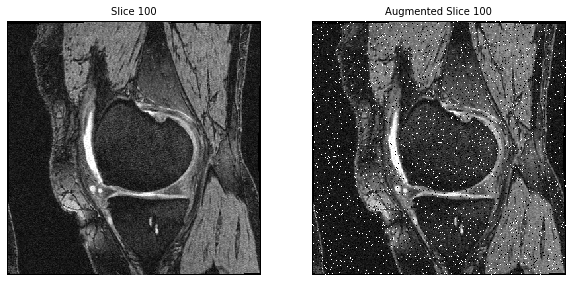

In [115]:
fig, axs = plt.subplots(1, 2, figsize = (10,10))

axs[0].imshow(img[...,slnum], vmin = 0, vmax = 0.005, cmap = 'gray')
axs[0].set_title('Slice {}'.format(slnum), fontsize= 10)
axs[0].axis('off')

axs[1].imshow(random_noise(img[...,slnum], mode = 's&p'), vmin = 0, vmax = 0.005, cmap = 'gray')
axs[1].set_title('Augmented Slice {}'.format(slnum), fontsize= 10)
axs[1].axis('off')

plt.show()